## 作業二

In [1]:
! wget https://raw.githubusercontent.com/ywchiu/tibame_tm/master/data/article.txt

--2020-07-22 11:33:05--  https://raw.githubusercontent.com/ywchiu/tibame_tm/master/data/article.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17982 (18K) [text/plain]
Saving to: ‘article.txt’

article.txt         100%[===================>]  17.56K  --.-KB/s    in 0.01s   

2020-07-22 11:33:05 (1.42 MB/s) - ‘article.txt’ saved [17982/17982]



In [2]:
import requests 
res = requests.get('https://raw.githubusercontent.com/ywchiu/tibame_tm/master/data/article.txt')
with open('article2.txt', 'w') as f:
  f.write(res.text)

In [5]:
with open('article.txt', encoding = 'utf-8') as f:
  data = f.read()

In [9]:
import jieba
#list(jieba.cut(data))

In [11]:
words = jieba.lcut(data)

In [13]:
type(words)

list

### 方法一

In [14]:
a = [1,1,2,2,1,3,1]
dic = {}
for w in a:
  if w not in dic:
    dic[w] = 1
  else:
    dic[w] = dic[w] + 1
dic

{1: 4, 2: 2, 3: 1}

In [19]:
dic = {}
for word in words:
  if len(word) >= 2:
    if word not in dic:
      dic[word] = 1
    else:
      dic[word] = dic[word] + 1

In [20]:
swd = sorted(dic.items(), key = lambda e: e[1], reverse=True)
swd[0:10]

[('我們', 68),
 ('台灣', 41),
 ('發展', 26),
 ('產業', 24),
 ('國家', 22),
 ('未來', 20),
 ('人民', 18),
 ('社會', 18),
 ('全球', 18),
 ('國際', 17)]

### 方法二

In [21]:
dic = {}
for word in words:
  if len(word) >= 2:
    dic[word] = dic.get(word, 0) + 1

In [22]:
swd = sorted(dic.items(), key = lambda e: e[1], reverse=True)
swd[0:10]

[('我們', 68),
 ('台灣', 41),
 ('發展', 26),
 ('產業', 24),
 ('國家', 22),
 ('未來', 20),
 ('人民', 18),
 ('社會', 18),
 ('全球', 18),
 ('國際', 17)]

### 方法三

In [24]:
from collections import Counter
c = Counter([w for w in words if len(w) >=2])
c.most_common(10)

[('我們', 68),
 ('台灣', 41),
 ('發展', 26),
 ('產業', 24),
 ('國家', 22),
 ('未來', 20),
 ('人民', 18),
 ('社會', 18),
 ('全球', 18),
 ('國際', 17)]

In [25]:
import wordcloud

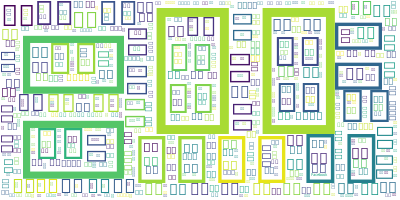

In [26]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(' '.join(jieba.cut(data)))
wordcloud.to_image()

In [27]:
! wget https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip

--2020-07-22 11:45:06--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 74.125.139.128, 2607:f8b0:400c:c05::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|74.125.139.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121247366 (116M) [application/zip]
Saving to: ‘NotoSansCJKtc-hinted.zip’

NotoSansCJKtc-hinte 100%[===================>] 115.63M  52.0MB/s    in 2.2s    

2020-07-22 11:45:09 (52.0 MB/s) - ‘NotoSansCJKtc-hinted.zip’ saved [121247366/121247366]



In [28]:

! unzip NotoSansCJKtc-hinted.zip

Archive:  NotoSansCJKtc-hinted.zip
  inflating: LICENSE_OFL.txt         
  inflating: NotoSansCJKtc-Black.otf  
  inflating: NotoSansCJKtc-Bold.otf  
  inflating: NotoSansCJKtc-DemiLight.otf  
  inflating: NotoSansCJKtc-Light.otf  
  inflating: NotoSansCJKtc-Medium.otf  
  inflating: NotoSansCJKtc-Regular.otf  
  inflating: NotoSansCJKtc-Thin.otf  
  inflating: NotoSansMonoCJKtc-Bold.otf  
  inflating: NotoSansMonoCJKtc-Regular.otf  
  inflating: README                  


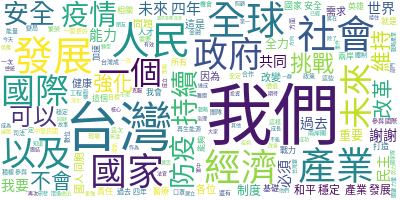

In [30]:
wc = WordCloud(background_color='white',font_path='/content/NotoSansCJKtc-Regular.otf')
wc.generate(' '.join(jieba.cut(data)))
wc.to_image()

## 詞頻矩陣

In [31]:
sentences = ["How to format my hard disk", "Hard disk format problems"]

In [34]:
words_set = []
for sentence in sentences:
  words = sentence.lower().split()
  words_set = words_set + words

In [36]:
set(words_set)

{'disk', 'format', 'hard', 'how', 'my', 'problems', 'to'}

In [40]:
id_to_word = {}
word_to_id = {}
for idx, word in enumerate(set(words_set)):
  #print(idx, word)
  id_to_word[idx] = word
  word_to_id[word] = idx

In [41]:
id_to_word

{0: 'my', 1: 'disk', 2: 'problems', 3: 'to', 4: 'how', 5: 'hard', 6: 'format'}

In [42]:
word_to_id

{'disk': 1, 'format': 6, 'hard': 5, 'how': 4, 'my': 0, 'problems': 2, 'to': 3}

In [45]:
import numpy as np
m = np.zeros((len(sentences), len(word_to_id)))

In [46]:
m.shape

(2, 7)

In [53]:
for i, sentence in enumerate(sentences):
  for w in sentence.lower().split():
    #print(w, i, word_to_id[w])
    m[i, word_to_id[w]] = 1

In [54]:
m

array([[1., 1., 0., 1., 1., 1., 1.],
       [0., 1., 1., 0., 0., 1., 1.]])

## Numpy

In [55]:
a = [1,3,5,7,9]
b = [2,4,6,8,10]

In [59]:
for i in range(0, len(a)):
  #print(i, a[i], b[i])
  print(a[i] * b[i])

2
12
30
56
90


In [60]:
for rec in zip(a,b):
  print(rec)

(1, 2)
(3, 4)
(5, 6)
(7, 8)
(9, 10)


In [61]:
for i, j  in zip(a,b):
  print(i,j)

1 2
3 4
5 6
7 8
9 10


In [62]:
for i, j  in zip(a,b):
  print(i * j)

2
12
30
56
90


In [63]:
a * b

TypeError: ignored

In [64]:
type(a)

list

In [65]:
a

[1, 3, 5, 7, 9]

In [67]:
import numpy as np
na = np.array(a)

In [68]:
type(na)

numpy.ndarray

In [69]:
na

array([1, 3, 5, 7, 9])

In [70]:
import numpy as np
na = np.array(a)
nb = np.array(b)

In [71]:
na + nb

array([ 3,  7, 11, 15, 19])

In [72]:
na * nb

array([ 2, 12, 30, 56, 90])

In [74]:
na = np.array([1,2,3,4,5])

In [75]:
na[0]

1

In [76]:
na[-1]

5

In [77]:
na > 3

array([False, False, False,  True,  True])

In [78]:
na[na > 3]

array([4, 5])

In [79]:
na = np.array([[1,2,3,4,5],[6,7,8,9,10]])

In [80]:
na

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [81]:
na[0,0]

1

In [82]:
na[0,:]

array([1, 2, 3, 4, 5])

In [83]:
na[:,0]

array([1, 6])

In [84]:
na.T

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

## 使用scikit-learn 建立詞頻矩陣

- fit: 產生結構
- fit_transform: 產生結構並轉換資料
- transform: 轉換資料

In [87]:
content = ["How to format my hard disk", "Hard disk format problems"]

In [89]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(content)

In [93]:
vectorizer.get_feature_names()

['disk', 'format', 'hard', 'how', 'my', 'problems', 'to']

In [91]:
X.toarray()

array([[1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 0, 0, 1, 0]])

In [92]:
X.shape

(2, 7)

In [96]:
content2 = ['i love hard disk']
X2 = vectorizer.transform(content2)

In [97]:
X2.toarray()

array([[1, 0, 1, 0, 0, 0, 0]])

## 建立詞袋模型

In [98]:
contents = ['This is a toy post about machine learning. Actually, it contains not much interesting stuff.',
'Imaging databases can get huge.',
'Most imaging databases safe images permanently.',
'Imaging databases store images.',
'Imaging databases store images. Imaging databases store images. Imaging databases store images.']


In [99]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(contents)

In [100]:
print(vectorizer.get_feature_names())

['about', 'actually', 'can', 'contains', 'databases', 'get', 'huge', 'images', 'imaging', 'interesting', 'is', 'it', 'learning', 'machine', 'most', 'much', 'not', 'permanently', 'post', 'safe', 'store', 'stuff', 'this', 'toy']


In [101]:
X

<5x24 sparse matrix of type '<class 'numpy.int64'>'
	with 33 stored elements in Compressed Sparse Row format>

In [106]:
new_post = 'imaging databases'

In [107]:
new_post_vec = vectorizer.transform([new_post])

In [108]:
new_post_vec

<1x24 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [109]:
new_post_vec.toarray()

array([[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]])

In [119]:
# euclidean distance
# sqrt(sum ((x - y) ^ 2))
import math
math.sqrt((((new_post_vec - X[0] ).toarray()) ** 2).sum())

4.0

In [117]:
import scipy as sp
sp.linalg.norm((new_post_vec - X[0] ).toarray())

4.0

In [121]:
def dist_raw(v1, v2):
  delta = v1-v2
  return sp.linalg.norm(delta.toarray())


In [123]:
for i in range(5):
  d = dist_raw(X[i], new_post_vec)
  print(contents[i], d)

This is a toy post about machine learning. Actually, it contains not much interesting stuff. 4.0
Imaging databases can get huge. 1.7320508075688772
Most imaging databases safe images permanently. 2.0
Imaging databases store images. 1.4142135623730951
Imaging databases store images. Imaging databases store images. Imaging databases store images. 5.0990195135927845


In [124]:
X[3].toarray()

array([[0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0]])

In [125]:
X[4].toarray()

array([[0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
        0, 0]])

In [126]:
def dist(v1, v2):
    v1_normalized  = v1 / sp.linalg.norm(v1.toarray()) 
    v2_normalized  = v2 / sp.linalg.norm(v2.toarray())
    delta = v1_normalized - v2_normalized
    return sp.linalg.norm(delta.toarray())


In [127]:
for i in range(5):
  d = dist(X[i], new_post_vec)
  print(contents[i], d)

This is a toy post about machine learning. Actually, it contains not much interesting stuff. 1.414213562373095
Imaging databases can get huge. 0.8573732768944039
Most imaging databases safe images permanently. 0.9194016867619662
Imaging databases store images. 0.7653668647301795
Imaging databases store images. Imaging databases store images. Imaging databases store images. 0.7653668647301795


In [128]:
vectorizer.get_feature_names()

['about',
 'actually',
 'can',
 'contains',
 'databases',
 'get',
 'huge',
 'images',
 'imaging',
 'interesting',
 'is',
 'it',
 'learning',
 'machine',
 'most',
 'much',
 'not',
 'permanently',
 'post',
 'safe',
 'store',
 'stuff',
 'this',
 'toy']

In [131]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(contents)

In [133]:
vectorizer.get_feature_names()

['actually',
 'contains',
 'databases',
 'huge',
 'images',
 'imaging',
 'interesting',
 'learning',
 'machine',
 'permanently',
 'post',
 'safe',
 'store',
 'stuff',
 'toy']

In [132]:
X

<5x15 sparse matrix of type '<class 'numpy.int64'>'
	with 24 stored elements in Compressed Sparse Row format>

In [134]:
new_post_vec = vectorizer.transform([new_post])

In [135]:
for i in range(5):
  d = dist(X[i], new_post_vec)
  print(contents[i], d)

This is a toy post about machine learning. Actually, it contains not much interesting stuff. 1.414213562373095
Imaging databases can get huge. 0.6058108930553725
Most imaging databases safe images permanently. 0.8573732768944039
Imaging databases store images. 0.7653668647301795
Imaging databases store images. Imaging databases store images. Imaging databases store images. 0.7653668647301795


In [138]:
print(vectorizer.get_feature_names())

['actually', 'contains', 'databases', 'huge', 'images', 'imaging', 'interesting', 'learning', 'machine', 'permanently', 'post', 'safe', 'store', 'stuff', 'toy']


In [136]:
X[3].toarray()

array([[0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

In [139]:
import nltk.stem
s = nltk.stem.SnowballStemmer('english')
s.stem('graphics')

'graphic'

In [140]:
print(s.stem("imaging"))
print(s.stem("image"))
print(s.stem("imagination"))
print(s.stem("imagine"))

imag
imag
imagin
imagin


In [141]:
import nltk.stem
english_stemmer = nltk.stem.SnowballStemmer('english')

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))


In [142]:
vectorizer = StemmedCountVectorizer(stop_words='english')
X = vectorizer.fit_transform(contents)

In [144]:
print(vectorizer.get_feature_names())

['actual', 'contain', 'databas', 'huge', 'imag', 'interest', 'learn', 'machin', 'perman', 'post', 'safe', 'store', 'stuff', 'toy']


In [143]:
X

<5x14 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [145]:
new_post_vec = vectorizer.transform([new_post])

In [146]:
for i in range(5):
  d = dist(X[i], new_post_vec)
  print(contents[i], d)

This is a toy post about machine learning. Actually, it contains not much interesting stuff. 1.414213562373095
Imaging databases can get huge. 0.6058108930553725
Most imaging databases safe images permanently. 0.6296288974669553
Imaging databases store images. 0.5176380902050415
Imaging databases store images. Imaging databases store images. Imaging databases store images. 0.5176380902050415


## TFIDF

In [148]:
a, abb, abc = ['a'], ['a', 'b', 'b'], ['a', 'b', 'c']
D = [a,abb,abc]

In [149]:
import math
# tfidf('a', a, D)
tf = 1/1
idf = math.log(3/3)
tf * idf

0.0

In [150]:
# tfidf('a', abb, D)
tf = 1/3
idf = math.log(3/3)
tf * idf

0.0

In [151]:
# tfidf('b', abb, D)
tf = 2/3
idf = math.log(3/2)
tf * idf

0.27031007207210955

In [152]:
# tfidf('a', abc, D)
tf = 1/3
idf = math.log(3/3)
tf * idf

0.0

In [153]:
# tfidf('b', abc, D)
tf = 1/3
idf = math.log(3/2)
tf * idf

0.13515503603605478

In [154]:
# tfidf('c', abc, D)
tf = 1/3
idf = math.log(3/1)
tf * idf

0.3662040962227032

In [155]:
def tfidf(t, d, D):
  tf = d.count(t) / len(d)
  idf  = math.log(len(D)/ len([doc for doc in D if t in doc]) )
  return tf * idf

In [156]:
tfidf('c', abc, D)

0.3662040962227032

In [157]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(contents)

In [159]:
#X.toarray()

In [160]:
class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(TfidfVectorizer,self).build_analyzer()
        return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))


In [164]:
vectorizer = StemmedTfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(contents)

In [165]:
X

<5x14 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [166]:
new_post_vec = vectorizer.transform([new_post])

In [167]:
for i in range(5):
  d = dist(X[i], new_post_vec)
  print(contents[i], d)

This is a toy post about machine learning. Actually, it contains not much interesting stuff. 1.4142135623730951
Imaging databases can get huge. 0.8681697052899789
Most imaging databases safe images permanently. 0.859044512133176
Imaging databases store images. 0.634205801303706
Imaging databases store images. Imaging databases store images. Imaging databases store images. 0.634205801303706


## 中文詞頻矩陣

In [168]:
ary = ['【更新】柯P：洪智坤洩漏公文案還沒看到公文　今處理',
       '留洪智坤 柯：殘障求職不易',
       '人事處議處洪智坤　柯P：不清楚議處結果']


In [174]:
import jieba
jieba.add_word('柯P')
jieba.add_word('人事處')
jieba.add_word('洪智坤')

In [175]:
corpus = []
for title in ary:
  corpus.append(' '.join(jieba.cut(title)))

In [176]:
corpus

['【 更新 】 柯P ： 洪智坤 洩漏 公文 案還 沒 看到 公文 \u3000 今處理',
 '留 洪智坤   柯 ： 殘障 求職 不易',
 '人事處 議處 洪智坤 \u3000 柯P ： 不 清楚 議處 結果']

In [177]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [179]:
print(vectorizer.get_feature_names())

['不易', '人事處', '今處理', '公文', '更新', '柯p', '案還', '殘障', '求職', '洩漏', '洪智坤', '清楚', '看到', '結果', '議處']


In [180]:
X.toarray()

array([[0, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 2]])

In [181]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [182]:
X.toarray()

array([[0.        , 0.        , 0.31738473, 0.63476946, 0.31738473,
        0.24137927, 0.31738473, 0.        , 0.        , 0.31738473,
        0.18745253, 0.        , 0.31738473, 0.        , 0.        ],
       [0.54645401, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.54645401, 0.54645401, 0.        ,
        0.32274454, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.35517252, 0.        , 0.        , 0.        ,
        0.27011786, 0.        , 0.        , 0.        , 0.        ,
        0.20977061, 0.35517252, 0.        , 0.35517252, 0.71034504]])